# Applying Bayes Decisison Rule to the Airline Class determination

This example is given in class and lecture notes. Recall that the following information was given:

An airline want to guess what ticket class, First class, Economy Plus, or Economy, a passenger is likely to choose based on their income. In the past, theairline has done studies and has found that for each ticket class the income distribution of peoiple choosing that ticket class forllow the normal distribution, but each for each class, the mean and standard deviation of income is different. Also, we know that. in general, 10% of passengers use First class, 30% use Economy Plus, and the remaining 60% use the Economy class. Therefore,

- First class passengers have an income distribution of $\cal{N}(\mu=310\text{K},\sigma=100\text{K})$, 10% of passengers are in this category
- Econmy Plus passengers have an income distribution of $\cal{N}(\mu=150\text{K},\sigma=40\text{K})$, 30% of passengers are in this category
- Economy passengers have an income distribution of $\cal{N}(\mu=80\text{K},\sigma=35\text{K})$, 60% of passengers are in this category
  
where $\cal{N}(\mu,\sigma)$ indicates a  normal distribution with mean $\mu$ and standard deviation $\sigma$. 

Here we draw the plots of these distributions of income for each class, scaled by their priors:

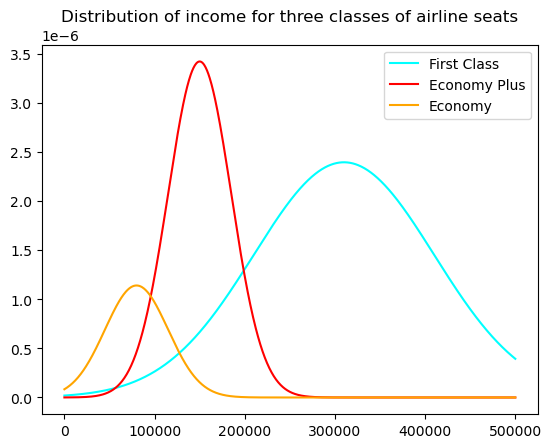

In [7]:
import numpy as np
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt

#Mean and standard deviation of incomes
mu1,mu2,mu3=310000,150000,80000

sigma1,sigma2,sigma3=100000,40000,35000

#Priors:
prior1,prior2,prior3=0.6,0.3,0.1


#Plot the three cases on the same panel

tt=np.linspace(0,500000,1000)
y_firstClass,y_economy_plus,y_economy=norm.pdf(tt,mu1,sigma1),norm.pdf(tt,mu2,sigma3),norm.pdf(tt,mu3,sigma3)


plt.plot(tt,y_firstClass*prior1,color="cyan",label='First Class')
plt.plot(tt,y_economy_plus*prior2,color="red",label='Economy Plus')
plt.plot(tt,y_economy*prior3,color="orange",label='Economy')
plt.title("Distribution of income for three classes of airline seats")
plt.legend()
plt.show()

## computing class probabilities and using them to decide classes base on Bayes decision rule

Then, given income $t=$130K, and the prior distribution of each class, we can see which seat class the Bayes decision rule favors this income level. We are interested in the following information:
- $\Pr[\text{First CLass}\mid \text{income=\$310,000}$
- $\Pr[\text{Economy Pluss}\mid \text{income=\$310,000}$
- $\Pr[\text{Economy}\mid \text{income=\$310,000}$

To calculate these values we use the Bayes formula for income=$t$: 

$$
\begin{aligned}
\Pr[\text{seat class}=c \mid t] &= \frac{\phi(t\mid \text{seat class}=c)\times p_{\text{prior}}(c)}{f(t)}\\
&=\frac{\phi(t\mid \mu_c,\sigma_c)\times p_{\text{prior}}(c)}{f(t)}
\end{aligned}
$$

where $\phi(t\mid\mu_c,\sigma_c)$ is the normal distribution's pdf with mean income $\mu_c$. and standard deviation income $\sigma_c$ for seat class $c$. 

We know that:

| Class| Mean Income | Stdandard deviation income | Income Distribution | Class prior|
|---|:-:|:-:|:-:|:-:|
| FC (First class) | $\mu_{\text{FC}}=\$310K$ | $\sigma_{\text{FC}}=\$100K$ | $\phi(t\mid \mu_{\text{FC}},\sigma_{\text{FC}})$ | $p_{\text{prior}}(\text{FC}) = 0.1$ |
| EP (Economy Plus) | $\mu_{\text{EP}}=\$150K$ | $\sigma_{\text{EP}}=\$40K$ | $\phi(t\mid \mu_{\text{EP}},\sigma_{\text{EP}})$ | $p_{\text{prior}}(\text{EP}) = 0.3$|
| E (Economy) | $\mu_{\text{E}}=\$80K$ | $\sigma_{\text{E}}=\$35K$ | $\phi(t\mid \mu_{\text{E}},\sigma_{\text{E}})$ | $p_{\text{prior}}(\text{E}) = 0.6$ |

With this oinformation at hand we can now compute the class probabilites given the income $t=130K$:

| Class | Class probability |
| --- | ---|
| FC | $\frac{\phi(t\mid \mu_{\text{FC}},\sigma_{\text{FC}})\times p_{\text{prior}}(\text{FC})}{f(t)}$|
| EP | $\frac{\phi(t\mid \mu_{\text{EP}},\sigma_{\text{EP}})\times p_{\text{prior}}(\text{EP})}{f(t)}$|
| E | $\frac{\phi(t\mid \mu_{\text{E}},\sigma_{\text{E}})\times p_{\text{prior}}(\text{E})}{f(t)}$|

We now need to determine $f(t)$. First, notice that for applying the Bayes decision rule it is not necessary to compute $f(t)$. Since all three class probabilites have a common denominator  $f(t)$, we only need to compare their numerators to see which one is the largest. However, to get the exact values of class probabilities we need to compute $f(t)$. The marginal density of passenger income (regradless of the seat class they choose) is given by:

$$
\begin{aligned}
f(t) &= f(t\mid \text{class = FC})\times p_{\text{prior}}(FC) + f(t\mid \text{class = EP})\times p_{\text{prior}}(EP) +f(t\mid \text{class = E})\times p_{\text{prior}}(E)\\
&=\phi\bigl(t\mid\mu_{\text{FC}},\sigma_{\text{FC}}\bigr) p_{\text{prior}}(FC) + \phi\bigl(t\mid\mu_{\text{EP}},\sigma_{\text{EP}}\bigr) p_{\text{prior}}(EP) + \phi\bigl(t\mid\mu_{\text{E}},\sigma_{\text{E}}\bigr) p_{\text{prior}}(E) 
\end{aligned}
$$

Using these facts we can now write the script to compute the ticket class probabilities for a person with an income of $t=\$130K$.

pr[0]=0.134, pr[1]=0.749, pr[2]=0.117
Bayes decision chooses: Economy Plus


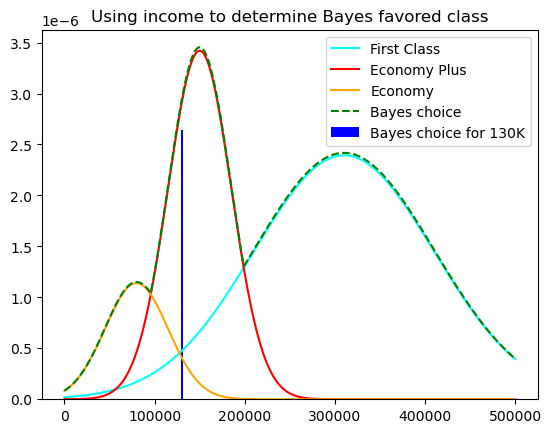

In [10]:
#New customer income:
t=130000

#Likelihoods are computed by scipy.stats functions norm.pdf for the pdf of normal distribution:

pr=[norm.pdf(t, mu1,sigma1)*prior1, norm.pdf(t,mu2,sigma2)*prior2, norm.pdf(t,mu3,sigma3)*prior3]
pr=pr/sum(pr)  #Not strictly needed but useful for probabilities
#print(f"{pr=}")
print(", ".join([f"pr[{i}]={pr[i]:.3f}" for i in range(len(pr))]))
airlineClass=["Economy", "Economy Plus", "First Class"]
print(f'Bayes decision chooses: {airlineClass[np.argmax(pr)]}')

plt.plot(tt,prior1*y_firstClass,color="cyan",label='First Class')
plt.plot(tt,prior2*y_economy_plus,color="red",label='Economy Plus')
plt.plot(tt,prior3*y_economy,color="orange",label='Economy')
# Show the maximum pdf (Draw dotted line slightly higher for better vision)
y_bayes=np.max(np.array([y_firstClass*prior1,y_economy_plus*prior2,y_economy*prior3]),axis=0)

plt.plot(tt,1.01*y_bayes,'--g',label='Bayes choice')
plt.bar(130000, width=2000, height=norm.pdf(130000,mu2,sigma2)*prior2,color='blue',label='Bayes choice for 130K')
plt.title("Using income to determine Bayes favored class")
plt.legend()
plt.show()

# Evaluating performance of classification

check https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

and https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve

In order to see vafrious performance measur concepts, we work on a simple classification example. We download a famous data set, handwritten digits. This data set can be obtained from various sources, one is given below.

Next, we use a generic method for classification called `SGDClassifier` with `log_loss` loss function. At this point it is not important what the classification algorithm is. We are only interested in the fact that this process runs some classification traing method, and then uses its model to predict on the new data instances. We here wish to see what various metrics such as classification error, precisison, recall, false negative rate, false positive rate, $F_1$ score, precisison-recall curve andthe ROC curve measure the results of this prediction.

We fisrt download the data and look at random digits from the data set, along with its place in the data, and its value (that is the $y$ value.)

In [13]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1, parser='auto')

And show some randomly selected images along with their labels:

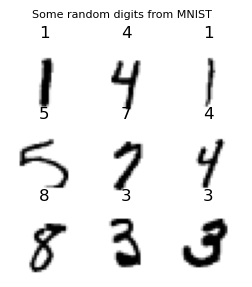

In [16]:
import random
import numpy as np
X,y=mnist['data'], mnist['target']
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(3,3))
for i in range(1,4):
    for j in range(1,4):
        indx=random.randint(0,X.shape[0])
        #digitFig=X[indx]
        #digitFig=digitFig.reshape(28,28)
        digitFig=np.array(X.iloc[indx]).reshape((28,28))
        yLabel=y[indx]
        sub=fig.add_subplot(3,3,(i-1)*3+j,title=f"{yLabel}",frame_on=False,)
        sub.axis('off')
        sub.imshow(digitFig, cmap='binary')
        #sub.title=f"the {indx}th digit, labeled as {yLabel}"
fig.suptitle('Some random digits from MNIST',x=0.5,y=1, size=8)
plt.show()


# Set up the training and the test sets

To see how the training algorithm works, we split the data into a "training set" and a "test set". We use the first 60,000 images in the data set as our training set. These data will be given to the training algorithm. The remainder are set aside as test set, and are used to see how well trained algorithm performs. 

We will perform another simplification. Although the data set has ten different classes, we focus on only digit `3' and train the classifier to just recognize images of threes. Thus, we have a binary classification problem: is the current image shows a 3 or not.

In [19]:
# split the data to training and test sets:
y=y.astype(np.uint8)
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

# turning to a '3' recognizer only:
y_train3=(y_train==3)
y_test3=(y_test==3)


import $\texttt{SGDClassifier}$ and use the $\texttt{fit}$ train the model:

In [22]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(loss="log_loss",random_state=42)

sgd_clf.fit(X_train, y_train3)


SGDClassifier(loss='log_loss', random_state=42)

Show some predictions. The plot picks a random $10\times 10$ set of digits from the test data, and shows whether the figure is a picture of a three or not, both the true value and the predicted value. The left symbol is T or F indicates whether in the data set the inmage is that of a '3' or not. The second is the prediction by the `SGDClassifier` algorithm.

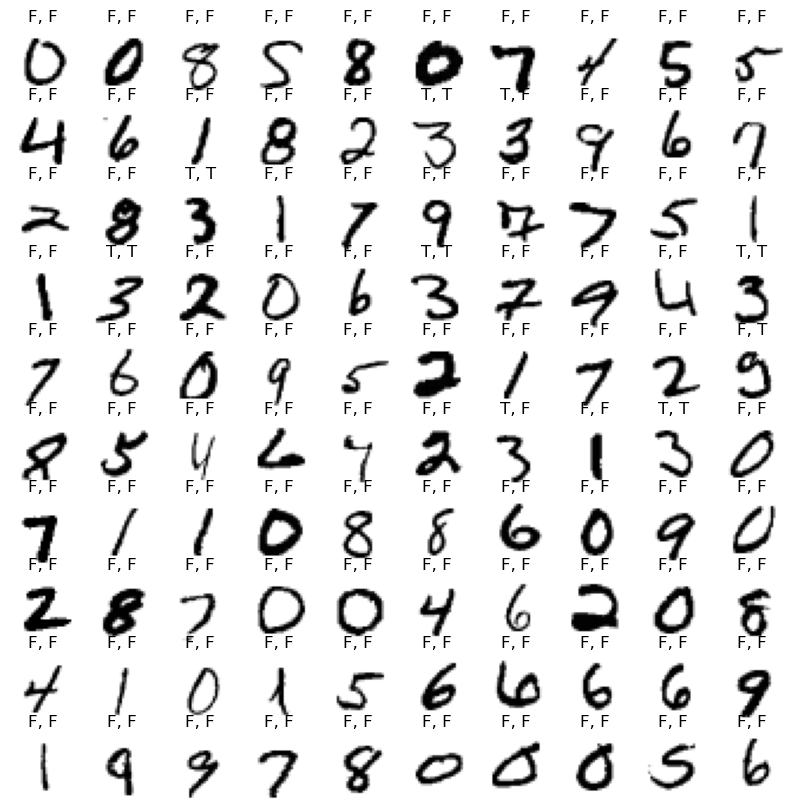

In [25]:
y_pred=sgd_clf.predict(X_test)
n=10 # n**2 samples will be drawn from the test set and displayed on an n x n grid

fig=plt.figure(figsize=(n,n))
label={False:'F',True:'T'}

for i in range(1,n+1):
    for j in range(1,n+1):
        indx=random.randint(0,X_test.shape[0])

        digitFig=np.array(X_test.iloc[indx]).reshape((28,28))
        sub=fig.add_subplot(n,n,(i-1)*n+j,title=f"{label[y_test3.iloc[indx]]}, {label[y_pred[indx]]}")
        sub.axis('off')
        sub.imshow(digitFig, cmap='binary')
        #sub.title=f"the {indx}th digit, labeled as {yLabel}"
        #plt.title("First letter T if pic of '3', and F otherwise,\n Second letter same for preduction")
plt.show()


# Evaluate

See https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

We now both print and visualize the confusion matrix. We also use the `classification_report` module to generate the precision, recall, $F_1$ score and the accuracy of the prediction on the test data. We also plot both the precision-recall curve, and the ROC curve, again using Scikit-Learn's provided functions.

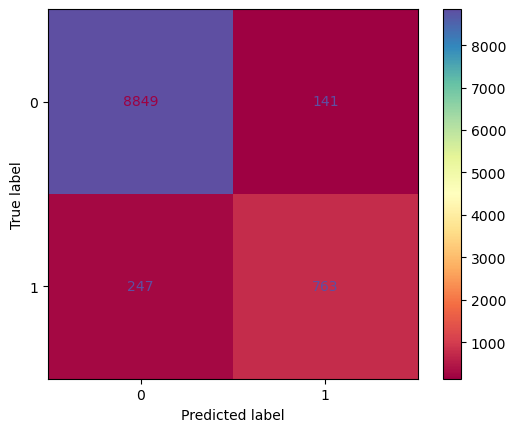

              precision    recall  f1-score   support

       False       0.97      0.98      0.98      8990
        True       0.84      0.76      0.80      1010

    accuracy                           0.96     10000
   macro avg       0.91      0.87      0.89     10000
weighted avg       0.96      0.96      0.96     10000



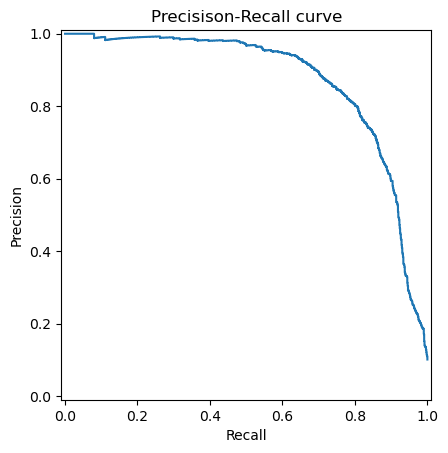

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


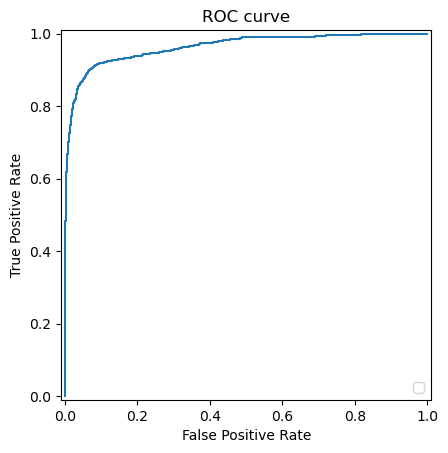

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_curve, RocCurveDisplay
#import seaborn as sns

C=confusion_matrix(y_test3, y_pred)
ConfusionMatrixDisplay(C).plot(cmap="Spectral")
plt.show()

#print("Confusion Matrix:\n", C)

print(classification_report(y_test3,y_pred))

y_score=sgd_clf.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test3, y_score)
fpr, tpr, _ = roc_curve(y_test3, y_score)

precDisplay=PrecisionRecallDisplay(precision, recall).plot()
plt.title("Precisison-Recall curve")
plt.show()
rocDisplay=RocCurveDisplay(fpr=fpr,tpr=tpr).plot()
plt.title("ROC curve")
plt.show()



We can use any other reasonable metric for precision-recall and ROC curves. For instance, here are are precision-recall curve using predicted probabilities as score:

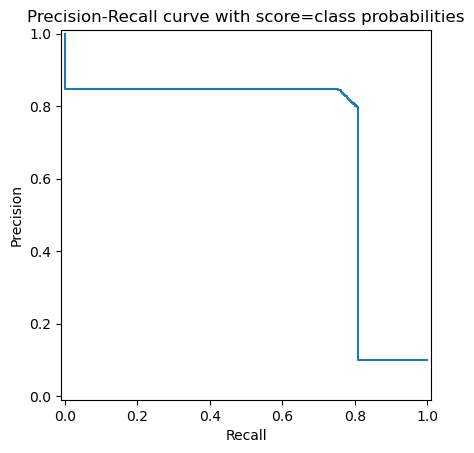

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


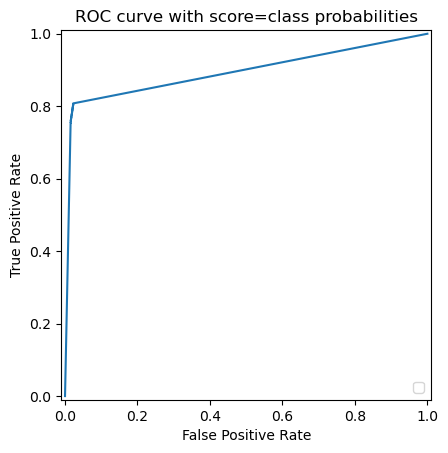

In [31]:
y_pred_prob=sgd_clf.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test3, y_pred_prob[:,1])
fpr, tpr, _ = roc_curve(y_test3, y_pred_prob[:,1])
precDisplay=PrecisionRecallDisplay(precision, recall).plot()
plt.title("Precision-Recall curve with score=class probabilities")
plt.show()
rocDisplay=RocCurveDisplay(fpr=fpr,tpr=tpr).plot()
plt.title("ROC curve with score=class probabilities")
plt.show()
